## Load Model

In [191]:
import os
import pickle
import pandas as pd
from  matplotlib import pyplot as plt

In [16]:
# path = '/home/zhshen/data/zebra_fish/DATA_TEMP/mytu/ANTs/aligned/'
# for root, dirs, files in os.walk(path):
#     if len(files) == 2:
#         print(root)

In [15]:
# path = '/data2/mytu/feature_generation/features/'
# for root, dirs, files in os.walk(path):
#     if len(files) == 2:
#         for file in files:
#             data_path = os.path.join(root, file)
#             print(data_path)

## generate to binary labels of addict/no-addict

In [36]:
old_features = {}
path = '/data2/mytu/feature_generation/features/old'
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.pkl'):
            #print(root)
            data_path = os.path.join(root, file)
#             print(data_path)
            #load features
            df = open(data_path, 'rb')
            data = pickle.load(df)
            df.close()
            
            #drugs info
            data_info = data_path.split('/')
#             print(data_info)
            fish_num = data_info[-1][0]
            fish_pos = data_info[-2]
            use_drug = data_info[-4][:4]
            drug_index = data_info[-6]
            
            drug_features = {
                drug_index:{
                    fish_num:{
                        fish_pos:{
                            use_drug:data
                        }
                    }
                }
            }
            
            if drug_index in old_features.keys():
                if fish_num in old_features[drug_index].keys():
                    if fish_pos in old_features[drug_index][fish_num].keys():
                        old_features[drug_index][fish_num][fish_pos].update(**drug_features[drug_index][fish_num][fish_pos])
                    else:
                        old_features[drug_index][fish_num].update(**drug_features[drug_index][fish_num])
                else:
                    old_features[drug_index].update(**drug_features[drug_index])
            else:
                old_features.update(**drug_features)

In [39]:
old_path = '/data2/mytu/feature_generation/features/old_features.pkl'
f = open(old_path, 'wb')
pickle.dump(old_features, f)
f.close()

In [7]:
drugs_features = {}
path = '/data2/mytu/feature_generation/features/drugs'
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.pkl'):
            #print(root)
            data_path = os.path.join(root, file)
#             print(data_path)
            #load features
            df = open(data_path, 'rb')
            data = pickle.load(df)
            df.close()
            
            #drugs info
            data_info = data_path.split('/')
#             print(data_info)
            fish_num = data_info[-1][0]
            fish_pos = data_info[-2]
            use_drug = data_info[-4][:4]
            drug_index = data_info[-6]
            
            drug_features = {
                drug_index:{
                    fish_num:{
                        fish_pos:{
                            use_drug:data
                        }
                    }
                }
            }
            
            if drug_index in drugs_features.keys():
                if fish_num in drugs_features[drug_index].keys():
                    if fish_pos in drugs_features[drug_index][fish_num].keys():
                        drugs_features[drug_index][fish_num][fish_pos].update(**drug_features[drug_index][fish_num][fish_pos])
                    else:
                        drugs_features[drug_index][fish_num].update(**drug_features[drug_index][fish_num])
                else:
                    drugs_features[drug_index].update(**drug_features[drug_index])
            else:
                drugs_features.update(**drug_features)

In [8]:
drugs_path = '/data2/mytu/feature_generation/features/drugs_features.pkl'
f = open(drugs_path, 'wb')
pickle.dump(drugs_features, f)
f.close()

In [9]:
len(drugs_features['HL-99']['1'])

2

In [264]:
drugs_path = '/data2/mytu/feature_generation/features/drugs_features.pkl'
f = open(drugs_path, 'rb')
drugs_features = pickle.load(f)
f.close()

In [325]:
old_path = '/data2/mytu/feature_generation/features/old_features.pkl'
f = open(old_path, 'rb')
old_features = pickle.load(f)
f.close()

In [326]:
# df_features_drugs = pd.DataFrame.from_dict(drugs_features)
df_features_old = pd.DataFrame.from_dict(old_features)

In [327]:
df_features_old.head(5)

,1046,1047,1049,1050,1051,1052,1053,1054,1055,1056,...,1324,1330,1516,1517,1518,1520,1522,1523,1531,1535
1,"{'Pos1': {'test': {'num_peaks': [5, 2, 4, 2, 4...","{'Pos1': {'test': {'num_peaks': [2, 2, 3, 2, 3...",NaN,"{'Pos1': {'test': {'num_peaks': [1, 2, 1, 1, 1...","{'Pos1': {'test': {'num_peaks': [1, 1, 1, 2, 2...","{'Pos1': {'test': {'num_peaks': [2, 0, 2, 1, 1...","{'Pos1': {'test': {'num_peaks': [6, 5, 4, 4, 5...","{'Pos1': {'cont': {'num_peaks': [0, 0, 1, 1, 2...","{'Pos1': {'test': {'num_peaks': [1, 1, 3, 3, 2...","{'Pos1': {'test': {'num_peaks': [2, 0, 3, 1, 3...",...,"{'Pos0': {'cont': {'num_peaks': [1, 1, 2, 0, 3...","{'Pos0': {'cont': {'num_peaks': [6, 3, 5, 1, 6...","{'Pos0': {'cont': {'num_peaks': [4, 3, 3, 2, 4...","{'Pos0': {'cont': {'num_peaks': [4, 4, 5, 1, 6...","{'Pos0': {'cont': {'num_peaks': [6, 3, 6, 3, 3...","{'Pos0': {'cont': {'num_peaks': [7, 7, 5, 2, 6...","{'Pos0': {'cont': {'num_peaks': [3, 7, 7, 1, 6...","{'Pos0': {'cont': {'num_peaks': [3, 2, 3, 0, 6...","{'Pos0': {'cont': {'num_peaks': [4, 3, 4, 3, 5...","{'Pos0': {'cont': {'num_peaks': [3, 3, 5, 3, 2..."
2,"{'Pos1': {'test': {'num_peaks': [1, 6, 8, 4, 1...","{'Pos1': {'test': {'num_peaks': [2, 1, 3, 4, 6...","{'Pos1': {'test': {'num_peaks': [1, 1, 1, 1, 1...","{'Pos1': {'test': {'num_peaks': [0, 3, 5, 1, 3...","{'Pos1': {'test': {'num_peaks': [0, 2, 2, 0, 1...","{'Pos1': {'test': {'num_peaks': [5, 0, 6, 5, 3...","{'Pos1': {'test': {'num_peaks': [0, 1, 1, 0, 1...","{'Pos1': {'test': {'num_peaks': [0, 3, 2, 2, 3...","{'Pos1': {'test': {'num_peaks': [0, 0, 0, 3, 4...","{'Pos1': {'test': {'num_peaks': [2, 1, 0, 2, 1...",...,"{'Pos0': {'cont': {'num_peaks': [1, 0, 3, 2, 3...","{'Pos0': {'cont': {'num_peaks': [4, 2, 3, 5, 3...","{'Pos0': {'cont': {'num_peaks': [2, 2, 3, 1, 3...","{'Pos0': {'cont': {'num_peaks': [6, 4, 6, 3, 2...","{'Pos0': {'cont': {'num_peaks': [2, 1, 4, 3, 2...","{'Pos0': {'cont': {'num_peaks': [5, 2, 4, 4, 1...","{'Pos0': {'cont': {'num_peaks': [4, 2, 6, 2, 2...","{'Pos0': {'cont': {'num_peaks': [1, 5, 3, 1, 4...","{'Pos0': {'cont': {'num_peaks': [4, 10, 9, 1, ...","{'Pos0': {'cont': {'num_peaks': [8, 8, 9, 4, 8..."
3,"{'Pos0': {'cont': {'num_peaks': [1, 1, 4, 0, 4...","{'Pos0': {'cont': {'num_peaks': [2, 1, 6, 0, 1...","{'Pos0': {'cont': {'num_peaks': [4, 5, 6, 3, 3...","{'Pos0': {'cont': {'num_peaks': [3, 2, 1, 1, 2...","{'Pos0': {'cont': {'num_peaks': [1, 1, 2, 1, 2...","{'Pos0': {'cont': {'num_peaks': [3, 3, 4, 5, 4...","{'Pos0': {'cont': {'num_peaks': [3, 4, 6, 3, 9...","{'Pos0': {'cont': {'num_peaks': [4, 2, 4, 3, 3...","{'Pos0': {'cont': {'num_peaks': [4, 2, 4, 1, 4...","{'Pos0': {'cont': {'num_peaks': [3, 2, 4, 3, 6...",...,NaN,NaN,"{'Pos0': {'cont': {'num_peaks': [3, 3, 3, 2, 3...","{'Pos0': {'cont': {'num_peaks': [8, 8, 11, 4, ...",NaN,NaN,NaN,"{'Pos0': {'cont': {'num_peaks': [6, 6, 7, 4, 6...","{'Pos0': {'cont': {'num_peaks': [2, 3, 5, 3, 3...","{'Pos0': {'cont': {'num_peaks': [1, 4, 4, 0, 0..."
4,"{'Pos0': {'cont': {'num_peaks': [3, 4, 4, 2, 5...","{'Pos0': {'cont': {'num_peaks': [6, 6, 7, 5, 4...","{'Pos0': {'cont': {'num_peaks': [3, 3, 3, 6, 4...","{'Pos0': {'cont': {'num_peaks': [3, 5, 4, 4, 2...","{'Pos0': {'cont': {'num_peaks': [1, 1, 1, 1, 1...","{'Pos0': {'cont': {'num_peaks': [2, 3, 7, 2, 4...","{'Pos0': {'cont': {'num_peaks': [3, 3, 1, 1, 3...","{'Pos0': {'cont': {'num_peaks': [6, 2, 3, 5, 6...","{'Pos0': {'cont': {'num_peaks': [3, 4, 5, 2, 4...","{'Pos0': {'cont': {'num_peaks': [2, 2, 3, 2, 2...",...,NaN,NaN,"{'Pos0': {'cont': {'num_peaks': [4, 2, 5, 4, 3...","{'Pos0': {'cont': {'num_peaks': [6, 6, 6, 4, 6...",NaN,NaN,NaN,"{'Pos0': {'cont': {'num_peaks': [2, 1, 3, 1, 4...","{'Pos0': {'cont': {'num_peaks': [2, 3, 3, 2, 3...","{'Pos0': {'cont': {'num_peaks': [2, 4, 3, 2, 4..."


In [202]:
demo = df_features_old['1046']['1'] 

In [200]:
df_demo = pd.DataFrame(demo)

In [83]:
demo_demo = df_demo['Pos0']['test']

In [85]:
demo_demo.keys()

dict_keys(['num_peaks', 'areas_sum', 'areas_mean', 'duration_mean', 'dr', 'height_max', 'height_mean', 'ap_mean', 'interval_mean', 'separation_mean', 'connection_corr', 'value_corr', 'active_regions'])

## Extract_Features to ndarray

In [11]:
def Extract_Features(demo, category):
    num_peaks = np.zeros([4, 100])
    try:
        num_peaks[0] = demo['Pos0']['cont'][category]
        num_peaks[1] = demo['Pos0']['test'][category]
        num_peaks[2] = demo['Pos1']['cont'][category]
        num_peaks[3] = demo['Pos1']['test'][category]
    except:
        num_peaks = np.nan
    return num_peaks

In [125]:
def Extract_Features(demo, category):
    num_peaks = np.zeros([600])
    try:
        c0 = np.array(demo['Pos0']['cont'][category])
        t0 = np.array(demo['Pos0']['test'][category])
        c1 = np.array(demo['Pos1']['cont'][category])
        t1 = np.array(demo['Pos1']['test'][category])
        num_peaks[0:100] = c0
        num_peaks[100:200] = t0
        num_peaks[200:300] = c1
        num_peaks[300:400] = t1
        num_peaks[400:500] = t0 - c0
        num_peaks[500:600] = t1 - c1
    except:
        num_peaks = np.nan
    return num_peaks

In [126]:
df_num_peaks = df_features_drugs.applymap(lambda x: Extract_Features(x, 'num_peaks'), na_action='ignore')
df_areas_sum = df_features_drugs.applymap(lambda x: Extract_Features(x, 'areas_sum'), na_action='ignore')
df_areas_mean = df_features_drugs.applymap(lambda x: Extract_Features(x, 'areas_mean'), na_action='ignore')
df_duration_mean = df_features_drugs.applymap(lambda x: Extract_Features(x, 'duration_mean'), na_action='ignore')
df_dr = df_features_drugs.applymap(lambda x: Extract_Features(x, 'dr'), na_action='ignore')
df_height_max = df_features_drugs.applymap(lambda x: Extract_Features(x, 'height_max'), na_action='ignore')
df_height_mean = df_features_drugs.applymap(lambda x: Extract_Features(x, 'height_mean'), na_action='ignore')
df_ap_mean = df_features_drugs.applymap(lambda x: Extract_Features(x, 'ap_mean'), na_action='ignore')
df_interval_mean = df_features_drugs.applymap(lambda x: Extract_Features(x, 'interval_mean'), na_action='ignore')
df_separation_mean = df_features_drugs.applymap(lambda x: Extract_Features(x, 'separation_mean'), na_action='ignore')

In [158]:
df_num_peaks = df_features_old.applymap(lambda x: Extract_Features(x, 'num_peaks'), na_action='ignore')
df_areas_sum = df_features_old.applymap(lambda x: Extract_Features(x, 'areas_sum'), na_action='ignore')
df_areas_mean = df_features_old.applymap(lambda x: Extract_Features(x, 'areas_mean'), na_action='ignore')
df_duration_mean = df_features_old.applymap(lambda x: Extract_Features(x, 'duration_mean'), na_action='ignore')
df_dr = df_features_old.applymap(lambda x: Extract_Features(x, 'dr'), na_action='ignore')
df_height_max = df_features_old.applymap(lambda x: Extract_Features(x, 'height_max'), na_action='ignore')
df_height_mean = df_features_old.applymap(lambda x: Extract_Features(x, 'height_mean'), na_action='ignore')
df_ap_mean = df_features_old.applymap(lambda x: Extract_Features(x, 'ap_mean'), na_action='ignore')
df_interval_mean = df_features_old.applymap(lambda x: Extract_Features(x, 'interval_mean'), na_action='ignore')
df_separation_mean = df_features_old.applymap(lambda x: Extract_Features(x, 'separation_mean'), na_action='ignore')

In [163]:
df_num_peaks.shape[1]

172

In [62]:
# num_peaks_ = df_separation_mean.to_numpy().flatten('F')

In [87]:
# separation_mean = np.zeros([416, 600])
# for index, value in enumerate(separation_mean_):
# #     print(value)
# #     print(value.shape)
#     try:
#         separation_mean[index] = value
#     except:
#         separation_mean[index] = np.nan

In [124]:
# np.array(demo['Pos0']['cont']['num_peaks']).shape

(100,)

In [139]:
# df_duration_mean['HL-101']

1    [nan, 8.0, 0.0, nan, 10.0, 13.0, nan, nan, 14....
2    [8.5, 26.0, 11.5, 12.0, nan, 12.5, 15.33333333...
3    [0.0, 14.666666666666666, 10.0, 11.8, 14.5, 18...
4    [0.0, 0.0, 0.0, 16.0, 13.75, 10.0, 14.5, 17.5,...
Name: HL-101, dtype: object

In [93]:
# need_move = list(set(np.where(np.isnan(separation_mean))[0]))

In [96]:
# preped_data = np.delete(separation_mean, need_move, axis=0)

In [97]:
# preped_data.shape

(388, 600)

In [164]:
def merge(df):
    separation_mean_ = df.to_numpy().flatten('F')
    separation_mean = np.zeros([df.shape[0] * df.shape[1], 600])
    for index, value in enumerate(separation_mean_):
    #     print(value)
    #     print(value.shape)
        try:
            separation_mean[index] = value
        except:
            separation_mean[index] = np.nan
    return separation_mean

In [165]:
num_peaks = merge(df_num_peaks)
areas_sum = merge(df_areas_sum)
areas_mean = merge(df_areas_mean)
duration_mean = merge(df_duration_mean)
dr = merge(df_dr)
height_max = merge(df_height_max)
height_mean = merge(df_height_mean)
ap_mean = merge(df_ap_mean)
interval_mean = merge(df_interval_mean)
separation_mean= merge(df_separation_mean)

In [320]:
num_peaks.shape

(416, 3, 200)

In [166]:
drugs_features_all = np.hstack((num_peaks, areas_sum, areas_mean, duration_mean, dr, height_max, height_mean, ap_mean, interval_mean, separation_mean))

In [167]:
need_move = list(set(np.where(np.isnan(separation_mean))[0]))

In [168]:
drugs_features_all = np.delete(drugs_features_all, need_move, axis=0)

In [169]:
drugs_features_all[np.isnan(drugs_features_all)] = 0

In [183]:
drugs_features.shape

(388, 6000)

In [285]:
old_features.shape

(559, 2000, 6)

In [180]:
features_all.shape

(962, 6000)

In [172]:
drugs_path = '/data2/mytu/feature_generation/features/drugs_features_all.npy'
old_path = '/data2/mytu/feature_generation/features/old_features_all.npy'
# np.save('/data2/mytu/feature_generation/features/drugs_features_all.npy', drugs_features_all)
# np.save('/data2/mytu/feature_generation/features/old_features_all.npy', drugs_features_all)
drugs_features = np.load(drugs_path)
old_features = np.load(old_path)

In [177]:
features_all = np.vstack((drugs_features, old_features))

In [188]:
label = np.hstack(([1] * drugs_features.shape[0], [0] * old_features.shape[0]))

In [194]:
# np.save('/data2/mytu/feature_generation/features/features_all.npy', features_all)
np.save('/data2/mytu/feature_generation/features/label.npy', label)

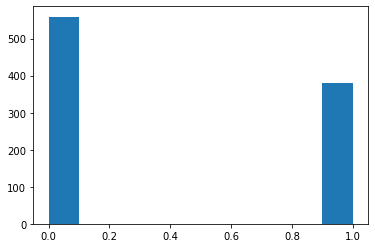

In [289]:
plt.hist(label)
plt.show()

## Extract_Features features to 2000*6 matrix

In [218]:
def Extract_more_Features(demo, category):
    features_pos0 = np.zeros([6, 100])
    features_pos1 = np.zeros([6, 100])
    try:
        #c0, t0 means raw data, nc0, nt0 are after normalization. 0\1 stands the pos of the fish.
        c0 = np.array(demo['Pos0']['cont'][category])
        t0 = np.array(demo['Pos0']['test'][category])
        nc0 = (c0 - np.min(c0)) / (np.max(c0) - np.min(c0))
        nt0 = (t0 - np.min(t0)) / (np.max(t0) - np.min(t0))
        c1 = np.array(demo['Pos1']['cont'][category])
        t1 = np.array(demo['Pos1']['test'][category])
        nc1 = (c1 - np.min(c1)) / (np.max(c1) - np.min(c1))
        nt1 = (t1 - np.min(t1)) / (np.max(t1) - np.min(t1))

        #pos0 features
        features_pos0[0] = c0
        features_pos0[1] = t0
        features_pos0[2] = nc0
        features_pos0[3] = nt0
        features_pos0[4] = t0 - c0
        features_pos0[5] = nt0 - nc0

        #pos1 features
        features_pos1[0] = c1
        features_pos1[1] = t1
        features_pos1[2] = nc1
        features_pos1[3] = nt1
        features_pos1[4] = t1- c1
        features_pos1[5] = nt1 - nc1

        features = np.hstack((features_pos0, features_pos1))
    except:
        features = np.nan
    return features

In [290]:
def Extract_more_Features(demo, category):
    features_pos0 = np.zeros([3, 100])
    features_pos1 = np.zeros([3, 100])
    try:
        #c0, t0 means raw data, nc0, nt0 are after normalization. 0\1 stands the pos of the fish.
        c0 = np.array(demo['Pos0']['cont'][category])
        t0 = np.array(demo['Pos0']['test'][category])
#         nc0 = (c0 - np.min(c0)) / (np.max(c0) - np.min(c0))
#         nt0 = (t0 - np.min(t0)) / (np.max(t0) - np.min(t0))
        c1 = np.array(demo['Pos1']['cont'][category])
        t1 = np.array(demo['Pos1']['test'][category])
#         nc1 = (c1 - np.min(c1)) / (np.max(c1) - np.min(c1))
#         nt1 = (t1 - np.min(t1)) / (np.max(t1) - np.min(t1))

        #pos0 features
        features_pos0[0] = c0
        features_pos0[1] = t0
        features_pos0[2] = t0 - c0
#         features_pos0[2] = nc0
#         features_pos0[3] = nt0
#         features_pos0[5] = nt0 - nc0

        #pos1 features
        features_pos1[0] = c1
        features_pos1[1] = t1
        features_pos1[2] = t1- c1
#         features_pos1[2] = nc1
#         features_pos1[3] = nt1
#         features_pos1[5] = nt1 - nc1

        features = np.hstack((features_pos0, features_pos1))
    except:
        features = np.nan
    return features

In [219]:
# df_num_peaks = df_features_old.applymap(lambda x: Extract_more_Features(x, 'num_peaks'), na_action='ignore')

/home/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [215]:
# Extract_more_Features(demo, 'num_peaks').shape

(6, 200)

In [291]:
df_num_peaks = df_features_old.applymap(lambda x: Extract_more_Features(x, 'num_peaks'), na_action='ignore')
df_areas_sum = df_features_old.applymap(lambda x: Extract_more_Features(x, 'areas_sum'), na_action='ignore')
df_areas_mean = df_features_old.applymap(lambda x: Extract_more_Features(x, 'areas_mean'), na_action='ignore')
df_duration_mean = df_features_old.applymap(lambda x: Extract_more_Features(x, 'duration_mean'), na_action='ignore')
df_dr = df_features_old.applymap(lambda x: Extract_more_Features(x, 'dr'), na_action='ignore')
df_height_max = df_features_old.applymap(lambda x: Extract_more_Features(x, 'height_max'), na_action='ignore')
df_height_mean = df_features_old.applymap(lambda x: Extract_more_Features(x, 'height_mean'), na_action='ignore')
df_ap_mean = df_features_old.applymap(lambda x: Extract_more_Features(x, 'ap_mean'), na_action='ignore')
df_interval_mean = df_features_old.applymap(lambda x: Extract_more_Features(x, 'interval_mean'), na_action='ignore')
df_separation_mean = df_features_old.applymap(lambda x: Extract_more_Features(x, 'separation_mean'), na_action='ignore')

In [302]:
df_num_peaks = df_features_drugs.applymap(lambda x: Extract_more_Features(x, 'num_peaks'), na_action='ignore')
df_areas_sum = df_features_drugs.applymap(lambda x: Extract_more_Features(x, 'areas_sum'), na_action='ignore')
df_areas_mean = df_features_drugs.applymap(lambda x: Extract_more_Features(x, 'areas_mean'), na_action='ignore')
df_duration_mean = df_features_drugs.applymap(lambda x: Extract_more_Features(x, 'duration_mean'), na_action='ignore')
df_dr = df_features_drugs.applymap(lambda x: Extract_more_Features(x, 'dr'), na_action='ignore')
df_height_max = df_features_drugs.applymap(lambda x: Extract_more_Features(x, 'height_max'), na_action='ignore')
df_height_mean = df_features_drugs.applymap(lambda x: Extract_more_Features(x, 'height_mean'), na_action='ignore')
df_ap_mean = df_features_drugs.applymap(lambda x: Extract_more_Features(x, 'ap_mean'), na_action='ignore')
df_interval_mean = df_features_drugs.applymap(lambda x: Extract_more_Features(x, 'interval_mean'), na_action='ignore')
df_separation_mean = df_features_drugs.applymap(lambda x: Extract_more_Features(x, 'separation_mean'), na_action='ignore')

In [292]:
def merge(df):
    feature_ = df.to_numpy().flatten('F')
    feature = np.zeros([df.shape[0] * df.shape[1], 3, 200])
    for index, value in enumerate(feature_):
    #     print(value)
    #     print(value.shape)
        try:
            feature[index] = value
        except:
            feature[index] = np.nan
    return feature

In [232]:
# df_separation_mean['1046'][1].shape

(6, 200)

In [303]:
num_peaks = merge(df_num_peaks)
areas_sum = merge(df_areas_sum)
areas_mean = merge(df_areas_mean)
duration_mean = merge(df_duration_mean)
dr = merge(df_dr)
height_max = merge(df_height_max)
height_mean = merge(df_height_mean)
ap_mean = merge(df_ap_mean)
interval_mean = merge(df_interval_mean)
separation_mean= merge(df_separation_mean)

In [304]:
num_peaks.shape

(416, 3, 200)

In [305]:
need_move = list(set(np.where(np.isnan(num_peaks))[0]))

In [306]:
drugs_features_all = np.concatenate((num_peaks, areas_sum, areas_mean, duration_mean, dr, height_max, height_mean, ap_mean, interval_mean, separation_mean), axis=2)

In [307]:
drugs_features_all_ = np.swapaxes(drugs_features_all, 1, 2)

In [308]:
drugs_features_all_.shape

(416, 2000, 3)

In [309]:
drugs_features_all_ = np.delete(drugs_features_all_, need_move, axis=0)

In [310]:
drugs_features_all_[np.isnan(drugs_features_all_)] = 0

In [311]:
# np.save('/data2/mytu/feature_generation/features/drugs_features_2000_3.npy', drugs_features_all_)
# np.save('/data2/mytu/feature_generation/features/old_features_2000_3.npy', drugs_features_all_)

In [322]:
drugs_path = '/data2/mytu/feature_generation/features/drugs_features_norm_all.npy'
old_path = '/data2/mytu/feature_generation/features/old_features_norm_all.npy'
drugs_features = np.load(drugs_path)
old_features = np.load(old_path)

In [313]:
features_all = np.vstack((drugs_features, old_features))

In [314]:
features_all.shape

(962, 2000, 3)

In [315]:
# np.save('/data2/mytu/feature_generation/features/features_2000_3.npy', features_all)

In [323]:
drugs_features.shape

(381, 2000, 6)

In [324]:
old_features.shape

(559, 2000, 6)

In [318]:
label = np.hstack(([1] * drugs_features.shape[0], [0] * old_features.shape[0]))

In [319]:
# np.save('/data2/mytu/feature_generation/features/label_2000_3.npy', label)